In [2]:
import os
import numpy as np 
import QuickSound.Sound as Sound
import librosa
import matplotlib.pyplot as plt
from scipy.signal import stft, cwt

1.0012113 6.899567e-05
(128, 126)


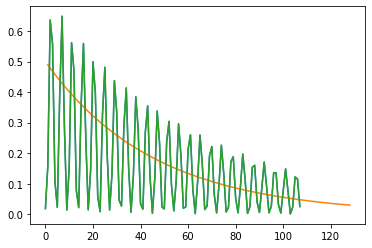

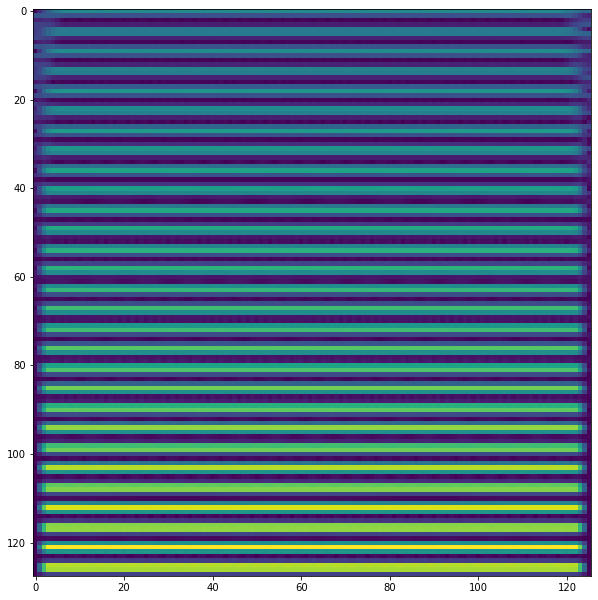

In [8]:
# Create sound
pure = Sound(samplerate=64000, amplitude=70)
pure.multi_freqs(np.geomspace(500, 30000, 30), duration=500)
pure.save_wav(name='PT_1k', path='')

sample, samplerate = librosa.load('PT_1k.wav', sr=64000)

C = librosa.cqt(sample, sr=64000, hop_length=256, fmin=500, n_bins=128,  bins_per_octave=22, filter_scale=1, res_type='fft')
C = np.abs(C)
print(np.max(C), np.min(C))
smoothness = 1

liss = np.convolve(C[20:, 50], np.ones(smoothness)/smoothness, mode='valid')
plt.plot(liss)
x = np.arange(1, C.shape[0]+1)
y = np.repeat(0.5*np.exp(-0.022*x), C.shape[1]).reshape(C.shape)

print(C.shape)

plt.plot(x, 0.5*np.exp(-0.022*x))
plt.plot(liss)

plt.show()
plt.close()
plt.figure(figsize=(10, 12))
plt.imshow(np.multiply(C, 1/y))
plt.show()


In [ ]:
sample, samplerate = librosa.load('PT_1k.wav', sr=64000)
f, t, Zxx = stft(sample, fs=samplerate, window='hamming', nperseg=512, noverlap=256)
plt.imshow(np.abs(Zxx))
plt.show()

In [ ]:
idx_log = np.geomspace(1, Zxx.shape[0], 128)
idx_log = [int(i) for i in idx_log]
print(idx_log)

In [ ]:
C = librosa.cqt(sample, sr=64000, hop_length=256, fmin=500, n_bins=120,  bins_per_octave=20, filter_scale=1, res_type='fft')
C = np.abs(C)
smoothness = 1

liss = np.convolve(C[20:, 50], np.ones(smoothness)/smoothness, mode='valid')

x = np.arange(1, C.shape[0]+1)
y = np.repeat(np.exp(-x*0.005), C.shape[1]).reshape(C.shape)



plt.plot(x, np.exp(-0.005*x))
plt.plot(liss)

plt.show()
plt.close()
plt.figure(figsize=(10, 12))
plt.imshow(np.multiply(C, 1/y))
plt.show()

In [ ]:
from scipy.signal import morlet
widths = np.arange(2, 64, 2)
C = cwt(sample, ricker, widths, window_size=1024)
plt.imshow(np.abs(C))
plt.show()
print(np.abs(C).shape)